In [25]:
train_normal = "C:/Users/Salman/Desktop/Covid19/train/normal"
train_covid = "C:/Users/Salman/Desktop/Covid19/train/corona"

In [26]:
train_main = "C:/Users/Salman/Desktop/Covid19/train"

In [27]:
valid_main = "C:/Users/Salman/Desktop/Covid19/val"

In [28]:
len(train_normal)

44

In [29]:
len(train_covid)

44

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [50]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen =  ImageDataGenerator(rescale=1./255)

# Data_Augmentation

In [51]:
datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

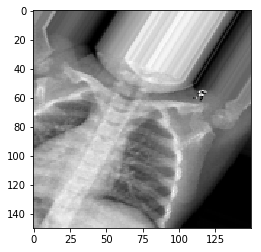

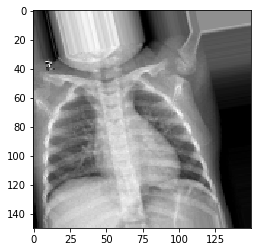

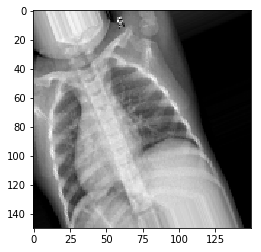

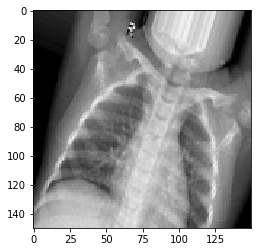

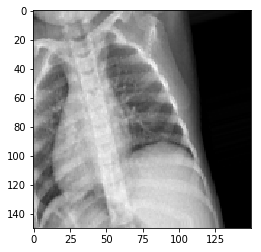

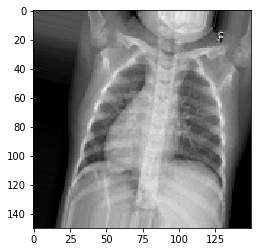

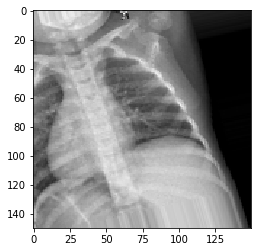

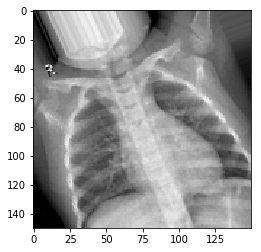

In [52]:
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt
fnames = [os.path.join(train_normal, fname) for
fname in os.listdir(train_normal)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 8 == 0:
        break
plt.show()


In [53]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])


In [54]:
datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,)




In [56]:
train_resize = train_datagen.flow_from_directory(
            train_main,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

Found 244 images belonging to 2 classes.


In [57]:
validation_resize = validation_datagen.flow_from_directory(
            valid_main,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')


Found 20 images belonging to 2 classes.


In [58]:
history = model.fit_generator(
            train_resize,
            steps_per_epoch=100,
            epochs=3,
            validation_data=validation_resize,
            validation_steps=20,
            
)

Epoch 1/3
100/100 [==============================] - 370s 4s/step - loss: 0.3689 - acc: 0.8448 - val_loss: 0.0423 - val_acc: 1.0000
Epoch 2/3
100/100 [==============================] - 351s 4s/step - loss: 0.0552 - acc: 0.9840 - val_loss: 0.0084 - val_acc: 1.0000
Epoch 3/3
100/100 [==============================] - 356s 4s/step - loss: 0.0099 - acc: 0.9979 - val_loss: 0.0019 - val_acc: 1.0000


In [59]:
model.save("Covid19.h5")

In [3]:
from tensorflow.keras.models import load_model
model = load_model("Covid19.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
img_path = 'C:/Users/Salman/Desktop/Covid19/test/normal/Normal_1.jpeg'
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [26]:
corona_img = model.predict(img_tensor[[0]])

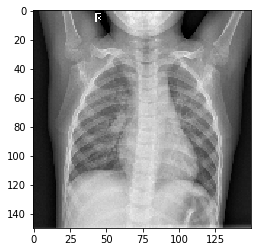

In [27]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [28]:
if corona_img < .50:
    print("Corona")
    
else:
    print("Normal")

Normal
